In [2]:
# Load necessary libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns
from matplotlib import gridspec
import math
import json

In [3]:
cards_csv = pd.read_csv('../dataset/cards.csv', sep=";")
prices_csv = pd.read_csv('../dataset/cardPrices.csv', sep=",")

print(f"cards len = {len(cards_csv)}")
print(f"prices len = {len(prices_csv)} \n")

print(f"Cards Columns Num = {cards_csv.shape[1]}")
print(f"Price Columns Num = {prices_csv.shape[1]}\n")
# number of unique dataset instances by uuid
card_unique = cards_csv['uuid'].nunique()
price_unique = prices_csv['uuid'].nunique()

print(f"cards unique = {card_unique}")
print(f"prices unique = {price_unique}")

cards len = 97145
prices len = 558079 

Cards Columns Num = 25
Price Columns Num = 8

cards unique = 97145
prices unique = 91302


In [4]:
dates = prices_csv['date'].nunique()
date = prices_csv['date'][0]
print(f"num of unique dates = {dates}")
print(f"date = {date}")

num of unique dates = 1
date = 2024-09-20


In [5]:
prices = prices_csv[prices_csv['currency'] == 'USD']

# drop constant columns
prices = prices.drop(columns=['currency'])
prices = prices.drop(columns=['date'])

# replace NaN values with False
cards_csv.loc[cards_csv['isReprint'].isna(), "isReprint"]= False


print(prices.nunique())
#print(prices['cardFinish'].unique())

cards = cards_csv.drop(columns=['finishes'])
cards = cards.drop(columns=['hasFoil'])
cards = cards.drop(columns=['hasNonFoil'])
cards = cards.drop(columns=['sourceProducts'])
"""
verrified that hasFoil and hasNonFoil arent reporting the same info

condition = (cards['hasFoil'] & ~cards['hasNonFoil']) | (~cards['hasFoil'] & cards['hasNonFoil'])
print(len(cards)) = 97145
print(len(cards[condition])) = 50011
"""

cardFinish              3
gameAvailability        2
price                6697
priceProvider           4
providerListing         2
uuid                89792
dtype: int64


"\nverrified that hasFoil and hasNonFoil arent reporting the same info\n\ncondition = (cards['hasFoil'] & ~cards['hasNonFoil']) | (~cards['hasFoil'] & cards['hasNonFoil'])\nprint(len(cards)) = 97145\nprint(len(cards[condition])) = 50011\n"

In [6]:
print(cards.nunique())

artist              1886
colorIdentity         31
colors                40
edhrecRank         25436
edhrecSaltiness      226
isReprint              2
language              17
layout                20
manaCost             815
manaValue             19
name               30233
number             14224
originalType        3823
power                 29
rarity                 6
setCode              684
supertypes             8
toughness             32
type                3331
types                 46
uuid               97145
dtype: int64


In [7]:
print(len(cards['colors'].unique()))

def unique_colors(value):
    if pd.isna(value):
        return None  # Return None for NaN
    # Split the value, standardize, and get unique characters
    characters = set(', '.join(sorted(value.split(', '))).replace(', ', ''))
    return ''.join(sorted(characters))

# Apply the function to the 'combinations' column
cards['colors'] = cards['colors'].apply(unique_colors)
cards['colorIdentity'] = cards['colorIdentity'].apply(unique_colors)
print(len(cards['colors'].unique()))

41
32


In [8]:
print(cards.nunique())

artist              1886
colorIdentity         31
colors                31
edhrecRank         25436
edhrecSaltiness      226
isReprint              2
language              17
layout                20
manaCost             815
manaValue             19
name               30233
number             14224
originalType        3823
power                 29
rarity                 6
setCode              684
supertypes             8
toughness             32
type                3331
types                 46
uuid               97145
dtype: int64


In [20]:
# Map True to 1 and False to 0
cards['isReprint'] = cards['isReprint'].astype(int)


In [9]:
print(f"Number of NA values: \n{cards.isnull().sum()} \n")
print(cards['colors'].unique())

Number of NA values: 
artist                24
colorIdentity      10718
colors             21033
edhrecRank          7408
edhrecSaltiness    26320
isReprint              0
language               0
layout                 0
manaCost           12807
manaValue              0
name                   0
number                 0
originalType       39054
power              50980
rarity                 0
setCode                0
supertypes         80064
toughness          50980
type                   0
types                  0
uuid                   0
dtype: int64 

['W' 'U' 'B' 'R' 'G' None 'BGW' 'UW' 'BU' 'BUW' 'BW' 'GRU' 'RU' 'BR' 'BG'
 'GR' 'GRW' 'RW' 'GUW' 'GU' 'BGRUW' 'GW' 'BRW' 'RUW' 'BGR' 'BRU' 'BGU'
 'BGUW' 'BRUW' 'GRUW' 'BGRW' 'BGRU']


In [10]:
cards2 = cards 

cards2['colors'] = cards2['colors'].fillna('C')
uc = cards2['colors'].unique()
print(uc)

['W' 'U' 'B' 'R' 'G' 'C' 'BGW' 'UW' 'BU' 'BUW' 'BW' 'GRU' 'RU' 'BR' 'BG'
 'GR' 'GRW' 'RW' 'GUW' 'GU' 'BGRUW' 'GW' 'BRW' 'RUW' 'BGR' 'BRU' 'BGU'
 'BGUW' 'BRUW' 'GRUW' 'BGRW' 'BGRU']


In [11]:
cards2['colorIdentity'] = cards2['colorIdentity'].fillna('C')
ucI = cards2['colorIdentity'].unique()
print(ucI)

['W' 'U' 'B' 'R' 'G' 'C' 'BGRUW' 'UW' 'RW' 'GW' 'BW' 'GR' 'BG' 'RU' 'BR'
 'BU' 'GU' 'BRW' 'BGW' 'BUW' 'GRU' 'GRW' 'GUW' 'RUW' 'BGR' 'BRU' 'BGU'
 'BGUW' 'BRUW' 'GRUW' 'BGRW' 'BGRU']


In [12]:
# we should keep both colors and colorIdentity 
cards2['match'] = cards.apply(lambda row: row['colors'] in row['colorIdentity'], axis=1)

test = cards2[cards2['match']== False]
noC = test[test['colors']!='C']
print(noC)
print(len(test))

                       artist colorIdentity colors  edhrecRank  \
24261            Pete Venters           BRU     BU     22571.0   
25385         Mathias Kollros           BRU     BU     17330.0   
25388              Kev Walker           RUW     RW     19908.0   
25402            Zoltan Boros           BGW     BW     12195.0   
25580          Randy Gallegos           BGW     BW     20380.0   
25583          Gabor Szikszai           BRW     BW     16143.0   
25584           Darrell Riche           BGR     BR     22233.0   
25587          Michael Sutfin           RUW     RW     22214.0   
25589           Paolo Parente           GRW     GW     21570.0   
25590            Greg Staples           GRU     GU     25331.0   
25592            Pete Venters           BRU     BU     22571.0   
25594             Daren Bader           GUW     GW     14682.0   
25851             Livia Prima         BGRUW     GW      4933.0   
25859    Victor Adame Minguez             G  BGRUW      5017.0   
25926     

In [13]:
# perform inner join based on UUID, then drop null values
primary = pd.merge(prices, cards, on="uuid")
primary = primary.dropna().reset_index(drop=True)
print(len(primary))
print(f"primary all data info -\n{primary.info()}")
print(f"primary Dtypes: \n{primary.dtypes.value_counts()}\n")
print(f"Combined dataset by uuid (all cards with prices) size: {len(primary)}")


18064
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18064 entries, 0 to 18063
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cardFinish        18064 non-null  object 
 1   gameAvailability  18064 non-null  object 
 2   price             18064 non-null  float64
 3   priceProvider     18064 non-null  object 
 4   providerListing   18064 non-null  object 
 5   uuid              18064 non-null  object 
 6   artist            18064 non-null  object 
 7   colorIdentity     18064 non-null  object 
 8   colors            18064 non-null  object 
 9   edhrecRank        18064 non-null  float64
 10  edhrecSaltiness   18064 non-null  float64
 11  isReprint         18064 non-null  object 
 12  language          18064 non-null  object 
 13  layout            18064 non-null  object 
 14  manaCost          18064 non-null  object 
 15  manaValue         18064 non-null  float64
 16  name              18064 non-null  

In [14]:
# fill in na and then drop remaining na shown below
cards2['originalType'] = cards2['originalType'].fillna('None')
cards2['power'] = cards2['power'].fillna('None')
cards2['supertypes'] = cards2['supertypes'].fillna('None')
cards2['toughness'] = cards2['toughness'].fillna('None')
print(f"Number of NA values: \n{cards2.isnull().sum()} \n")

Number of NA values: 
artist                24
colorIdentity          0
colors                 0
edhrecRank          7408
edhrecSaltiness    26320
isReprint              0
language               0
layout                 0
manaCost           12807
manaValue              0
name                   0
number                 0
originalType           0
power                  0
rarity                 0
setCode                0
supertypes             0
toughness              0
type                   0
types                  0
uuid                   0
match                  0
dtype: int64 



In [15]:
# perform inner join based on UUID, then drop null values
secondary = pd.merge(prices, cards2, on="uuid")
secondary = secondary.dropna().reset_index(drop=True)
print(len(secondary))
print(f"primary all data info -\n{secondary.info()}")
print(f"primary Dtypes: \n{secondary.dtypes.value_counts()}\n")
print(f"Combined dataset by uuid (all cards with prices) size: {len(secondary)}")


269807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269807 entries, 0 to 269806
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cardFinish        269807 non-null  object 
 1   gameAvailability  269807 non-null  object 
 2   price             269807 non-null  float64
 3   priceProvider     269807 non-null  object 
 4   providerListing   269807 non-null  object 
 5   uuid              269807 non-null  object 
 6   artist            269807 non-null  object 
 7   colorIdentity     269807 non-null  object 
 8   colors            269807 non-null  object 
 9   edhrecRank        269807 non-null  float64
 10  edhrecSaltiness   269807 non-null  float64
 11  isReprint         269807 non-null  object 
 12  language          269807 non-null  object 
 13  layout            269807 non-null  object 
 14  manaCost          269807 non-null  object 
 15  manaValue         269807 non-null  float64
 16  name         

## Quantitative Data Analysis

In [16]:
# Analyze quantitative data columns
quantitative = data.select_dtypes(include=['number'])

print(quantitative.describe())

NameError: name 'data' is not defined

In [277]:
# plot function 

def plot(data, type, color=plt.cm.viridis(0.2), bins=None, lim=None):
    """Creates plots for the quantitative DataFrame
    Args:
        - data: dataframe
        - type: type of plot (hist, box)
        - color: plot color
        - bins: number of bins in this hist
        - lim: optional bound for graph
    """
    # subplot calcuations for size
    num = len(data.columns)
    ncols = 2
    nrows = int(np.ceil(num / ncols))

    # size based on nrows
    plt.figure(figsize=(12, 5*nrows))

    for i, column in enumerate(data.columns):      
        plt.subplot(nrows,ncols,i+1)
        if type == "hist":
            plt.hist(data[column], color = color, bins=bins)
            plt.title(f"Histogram of {column}")
            plt.ylabel("Frequency")
            plt.xlabel("Value")
            if lim:
                plt.title(f"Histogram of {column} bounded under {lim}")
                plt.xlim(0,lim)
        elif type == "box":
            if bins == 2 and column != "price":
                sns.boxplot(x = column, y = "price", data = data)
                plt.ylabel("price")
            else:
                plt.boxplot(data[column], whis=lim, patch_artist=True)
                plt.ylabel("Value")
            plt.title(f"Box Plot of {column}")
            if lim:
                plt.ylim(0,lim)
    plt.show()

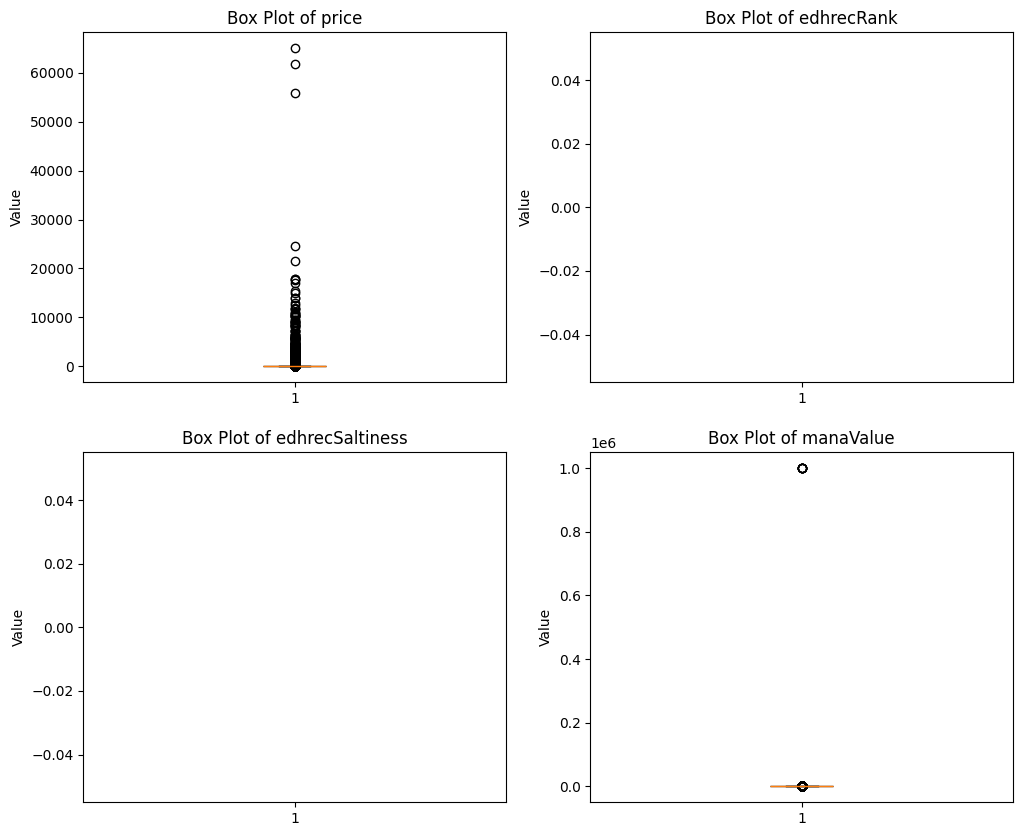

In [278]:
plot(quantitative, "box")

By Empirical Rule 99.7% of the price values should be below 653.1782850241042. 
So below is the adjusted graph for Prices to show 99.7% of the data.


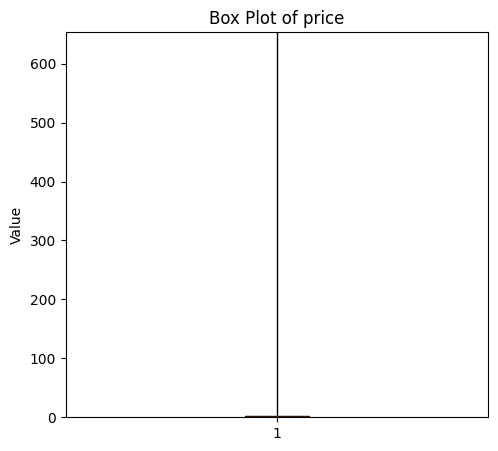

In [279]:
upper_third_std = quantitative["price"].mean() + (3 * quantitative["price"].std())
print(f"By Empirical Rule 99.7% of the price values should be below {upper_third_std}. \nSo below is the adjusted graph for Prices to show 99.7% of the data.")

plot(quantitative[["price"]], "box", lim=upper_third_std)

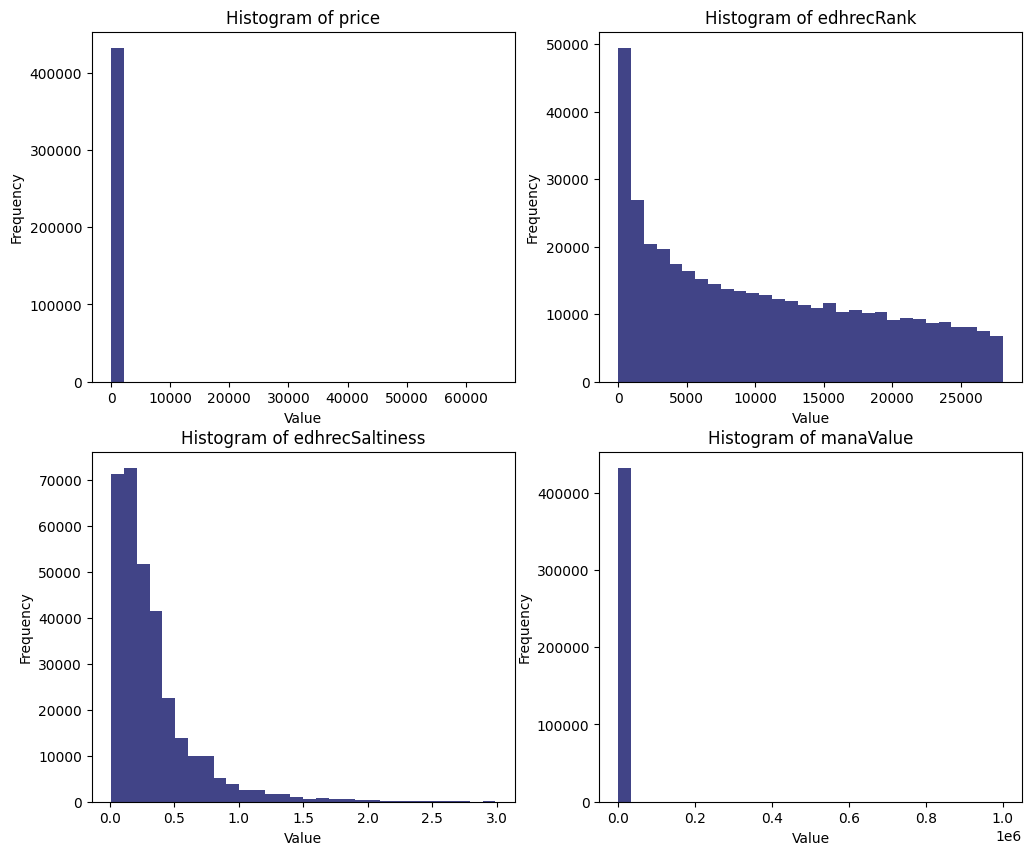

In [280]:
plot(quantitative, "hist", bins=30)

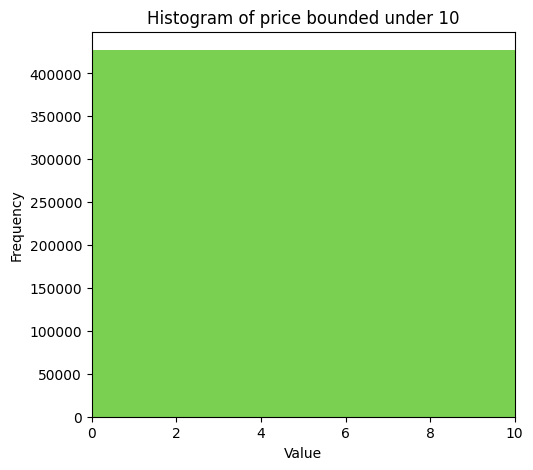

In [281]:
plot(quantitative[["price"]], "hist", plt.cm.viridis(0.8), bins=1000, lim=10)

In [282]:
# Correlations
def corr(data):
    """Plot correlation between variables in a dataframe
    Args:
        - data: dataframe
    """
    correlation_matrix = data.corr()
    
    # get price to be the first variable
    ordered = ['price'] + [col for col in correlation_matrix.columns if col != 'price']
    ordered_correlation_matrix = correlation_matrix.loc[ordered, ordered]

    plt.figure(figsize=(10,8))
    sns.heatmap(ordered_correlation_matrix, annot=True, fmt='.2f', cmap='cividis', square=True, linewidths=0.5)
    plt.title("Correlation Heatmap of Variables")
    plt.show()

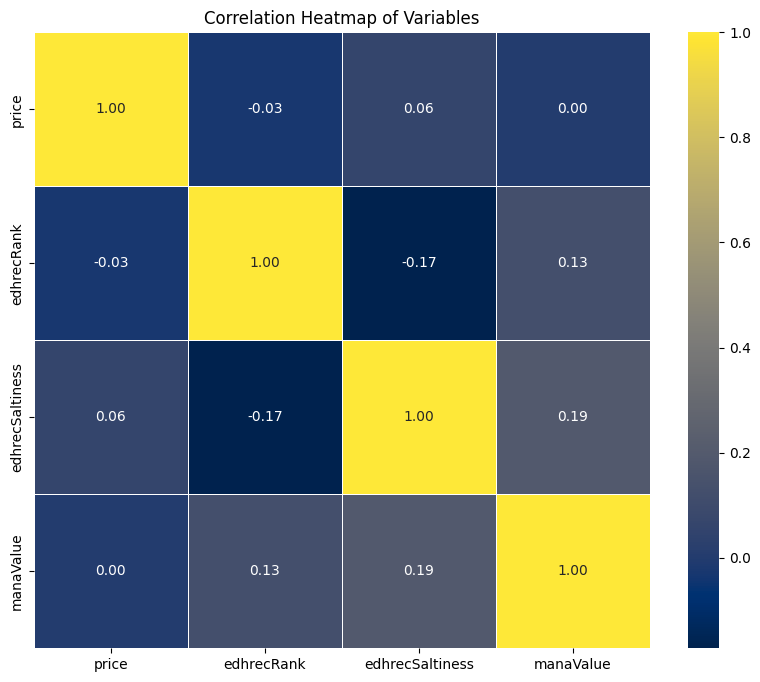

In [283]:
corr(quantitative)

#### Corellation Coefficient Interpretations

- Price vs EdhrecRank (-0.15): weak negative correlation. Very slight tendency for higher EdhrecRanks to be associated with lower prices
- Price vs EdhrecSaltiness (0.33): moderate positive correlation. As price increases, the edhrecSaltiness also tends to increase
- Price vs ManaValue (0.08): Week positive correlation. Almost no relationship, no significat influence on the price

## Categorical Data Analysis

In [284]:
# Get unique counts for qualitative variables

unique_counts = {}
binary_data = pd.DataFrame()
mapped_cat = {}
extra_cat = pd.DataFrame()

for column in data.columns:
    count = data[column].nunique()
    unique = data[column].unique()

    unique_counts[column] = {
        "Unique Counts": count,
        "Counts": data[column].value_counts().to_dict()
    }
    if count == 2:
        mapping = {unique[0]: 1, unique[1]: 0}
        binary_data[column] = data[column].map(mapping)
        mapped_cat[column] = mapping
    else:
        if column in quantitative:
            # skip quantiative columns for the binary_data
            continue
        else:
            # number of columns that have more than 2 unique values (TODO one-hot encoding)
            extra_cat[column] = data[column]



unique_df = pd.DataFrame(unique_counts).T

print(f"Initial evaluation of unique data. \n{unique_df}\n")
print(f"Mapped Categories: {mapped_cat}\n")
print(f"Binary Categories: {binary_data}")

Initial evaluation of unique data. 
                 Unique Counts  \
cardFinish                   3   
gameAvailability             2   
price                     6694   
priceProvider                4   
providerListing              2   
uuid                     88614   
artist                    1812   
colorIdentity               31   
colors                      40   
edhrecRank               25125   
edhrecSaltiness            226   
finishes                     8   
hasFoil                      2   
hasNonFoil                   2   
isReprint                    2   
language                    17   
layout                      20   
manaCost                   798   
manaValue                   19   
name                     29226   
number                   11144   
originalType              3801   
power                       29   
rarity                       6   
setCode                    616   
sourceProducts            6074   
supertypes                   8   
toughness   

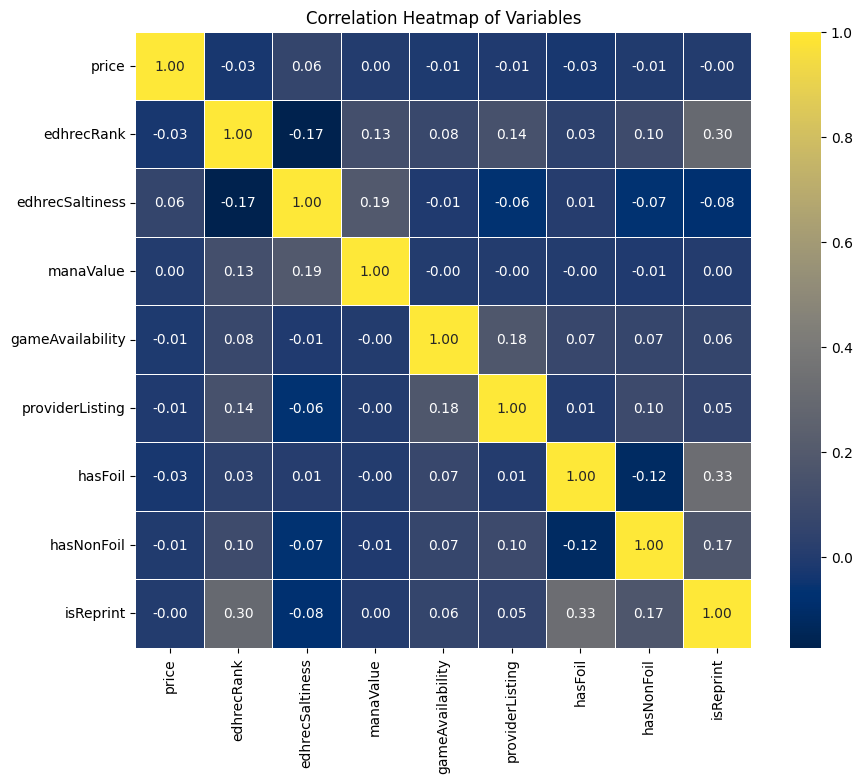

In [285]:
# add dataframes together horizontally
mapped_data = pd.concat([quantitative, binary_data], axis=1)

corr(mapped_data)

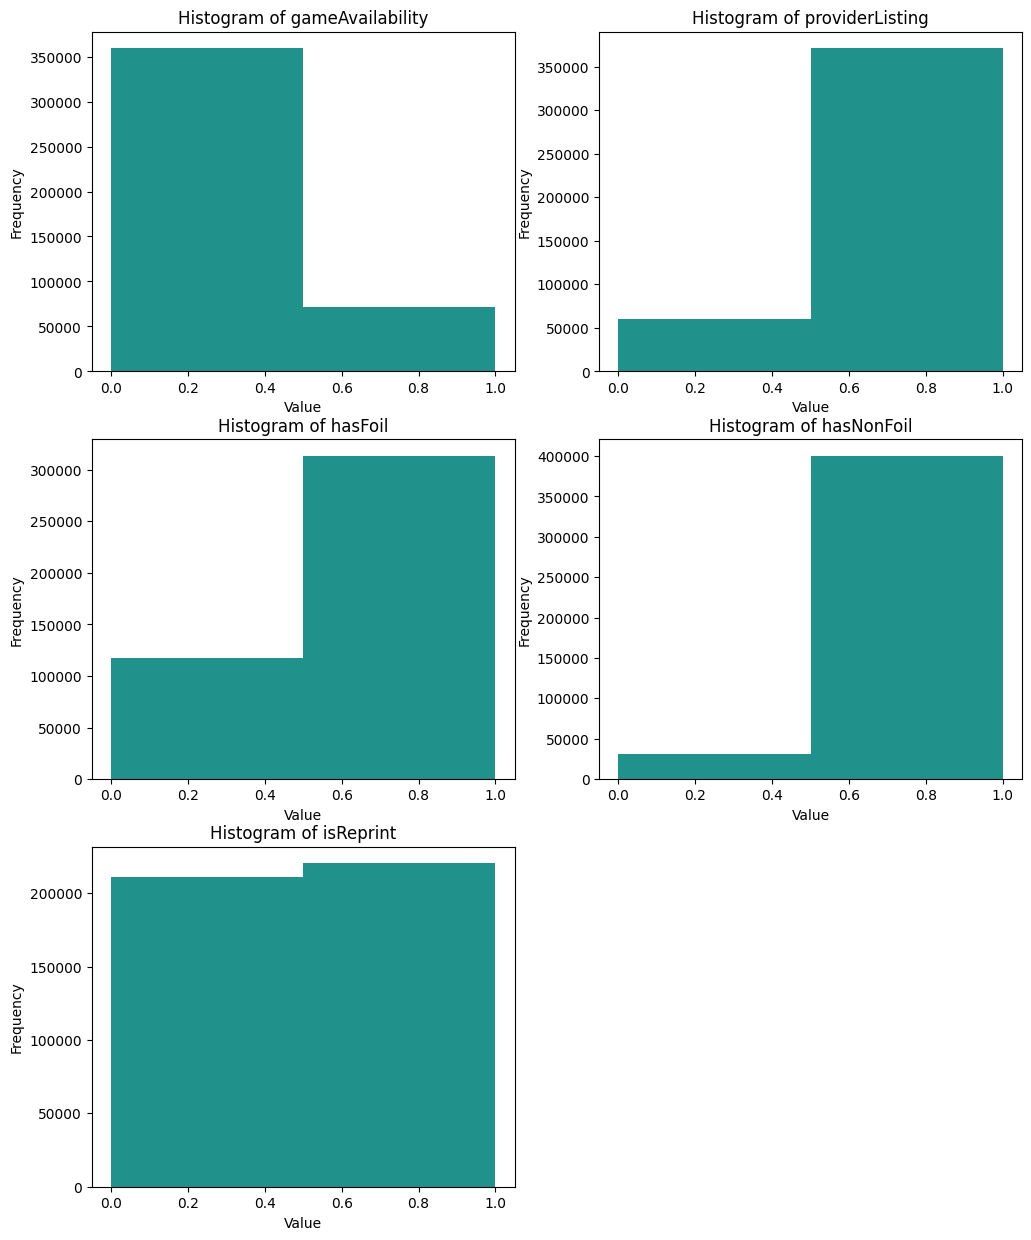

In [286]:
plot(binary_data, "hist", color=plt.cm.viridis(0.5), bins=2)

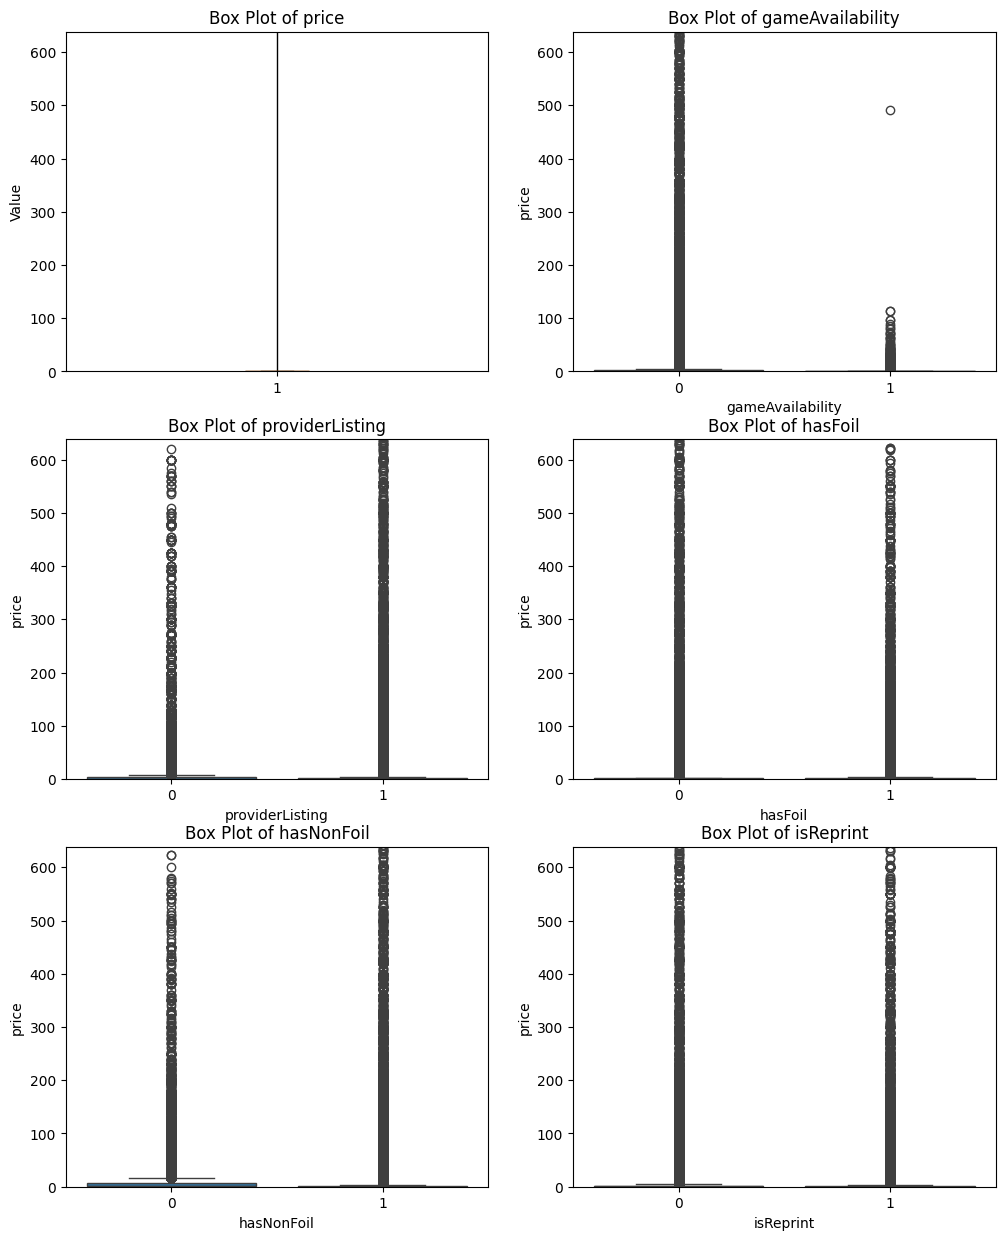

In [287]:
# Show all binary categories by price on a boxplot

plot(mapped_data.drop(columns=["edhrecRank", "edhrecSaltiness", "manaValue"]), "box", color=plt.cm.viridis(0.5), bins=2, lim=upper_third_std-15)

In [288]:
print(mapped_data.head())

# TODO fix this variable export so we dont have to save out variables to then use in other files

# __all__ = ['mapped_data']

mapped_data.to_csv('../dataset/mapped_data.csv', index=False)

   price  edhrecRank  edhrecSaltiness  manaValue  gameAvailability  \
0   0.11         NaN              NaN        0.0                 1   
1   0.29         NaN              NaN        0.0                 1   
2   0.02         NaN              NaN        0.0                 1   
3   0.13         NaN              NaN        0.0                 1   
4   0.02         NaN              NaN        0.0                 1   

   providerListing  hasFoil  hasNonFoil  isReprint  
0                1        1           1          1  
1                1        1           1          1  
2                1        1           1          1  
3                1        1           1          1  
4                1        1           1          1  


In [289]:
# TODO one-hot encoding or some type of encoding for categorical variables

print(f"Num of Categories that have more than 2 unique values: {extra_cat.columns}")

Num of Categories that have more than 2 unique values: Index(['cardFinish', 'priceProvider', 'uuid', 'artist', 'colorIdentity',
       'colors', 'finishes', 'language', 'layout', 'manaCost', 'name',
       'number', 'originalType', 'power', 'rarity', 'setCode',
       'sourceProducts', 'supertypes', 'toughness', 'type', 'types'],
      dtype='object')
